# Solution 5

## FINM 37400 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Forward Rates

Use the data set `treasury_zero_coupon_2022-12-30.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \\$1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by *stripping* out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of December in 2017 through 2022.

## 1.1

For each of the six dates, (Dec 2017, Dec 2018, ...), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

## 1.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, at the six dates.

Make a plot of the curve, $f$, at each of these six dates.

## 1.3

Calculate the continuously compounded spot rates, $r$, at the six dates.

Plot both the forward curve and the spot curve on the date of Dec 2017.

Recall that $f(t,t,t+1) = r(t,t+1)$.

## 1.4

Plot the forward curve on Dec 2017 against the time-series evolution of $r(t,t+1)$ for dates $t$ between Dec 2017 and Dec 2021.

How does the evolution of one-year rates between 2017-2021 compare to the forward rates of 2017?

# 2. Carry Trade

## 2.1

Suppose it is December 2017, and you determine to implement a carry trade with the following specification...

* Long \\$100 million of the 5-year zero-coupon bond (maturing Dec 2022.)
* Short \\$100 million of the 1-year zero-coupon bond (maturing Dec 2018.)
* Assume there is a 2% haircut on each side of the trade, so it requires \\$4 million of investor capital to initiate it.

Trace the profit and loss each year.
* Note that each year you will roll over the short position until the trade concludes in Dec 2022.

Calculate the total profit and loss when the trade concludes in Dec 2022.
* Calculate the total return on the initial \\$4 million of investor capital.

## 2.2

How would this trade play out if the path of one-year spot rates equaled the forward rates observed in 2017?

## 2.3

Given Fact 3 of the *dynamic* (conditional) tests of EH in notebook W.5., do you expect that as of Dec 2022 the long-short trade above looks more or less favorable as of Dec 2022-2027 than it did as of Dec 2017-2022?

# <span style="color:red">Solutions</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

In [2]:
filepath = '../data/treasury_zero_coupon_2022-12-30.xlsx'
prices = pd.read_excel(filepath, sheet_name='prices')
prices.set_index('date',inplace=True)
prices.columns = prices.columns.astype(int)
prices

,1,2,3,4,5
date,,,,,
1952-06-30,0.981778,0.962531,0.942467,0.926341,0.904183
1952-07-31,0.980948,0.960315,0.939312,0.923089,0.898516
1952-08-29,0.980578,0.959750,0.937819,0.921458,0.895717
1952-09-30,0.980312,0.959098,0.937551,0.920961,0.891676
1952-10-31,0.981108,0.959745,0.937583,0.919290,0.897248
...,...,...,...,...,...
2022-08-31,0.965955,0.933432,0.900600,0.871263,0.846584
2022-09-30,0.959839,0.918517,0.880655,0.846696,0.816731
2022-10-31,0.954288,0.914926,0.876564,0.841926,0.811304


# <span style="color:red">Solution 1</span>

Select key dates referenced in the question.

In [3]:
px = prices.iloc[-61::12]
px

,1,2,3,4,5
date,,,,,
2017-12-29,0.982422,0.963139,0.942395,0.918869,0.895638
2018-12-31,0.974310,0.951959,0.929327,0.905801,0.882568
2019-12-31,0.984394,0.968938,0.952964,0.935710,0.918910
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298


Calculate spot rates for comparison.

In [4]:
spots = -np.log(px)/px.columns
spots

,1,2,3,4,5
date,,,,,
2017-12-29,0.017734,0.018779,0.019777,0.021153,0.022044
2018-12-31,0.026026,0.024617,0.024431,0.024734,0.024984
2019-12-31,0.015729,0.015777,0.016059,0.016612,0.016913
2020-12-31,0.001042,0.001242,0.001571,0.002650,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618


## <span style="color:red">1.1</span>

In [5]:
F = px[[2,3,4,5]] / px[[1,2,3,4]].values
F

,2,3,4,5
date,,,,
2017-12-29,0.980372,0.978461,0.975036,0.974718
2018-12-31,0.977060,0.976226,0.974684,0.974351
2019-12-31,0.984299,0.983514,0.981894,0.982046
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870


<AxesSubplot:>

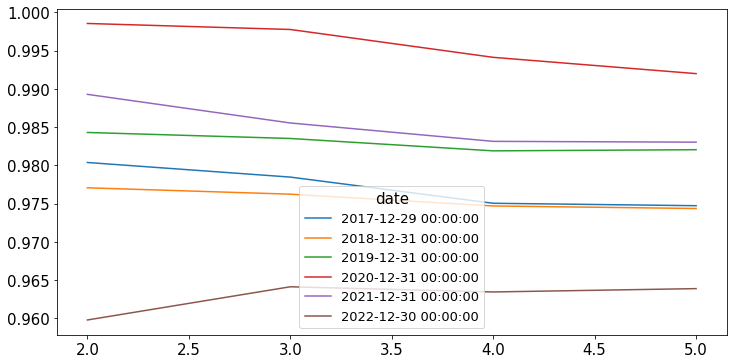

In [6]:
F.T.plot()

## <span style="color:red">1.2</span>

In [7]:
f = -np.log(F)
f.insert(0,1,spots[1])
f

,1,2,3,4,5
date,,,,,
2017-12-29,0.017734,0.019823,0.021774,0.025281,0.025607
2018-12-31,0.026026,0.023207,0.024061,0.025642,0.025984
2019-12-31,0.015729,0.015825,0.016624,0.018272,0.018117
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799


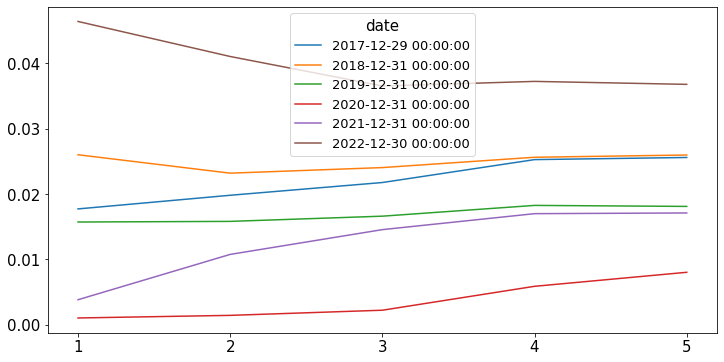

In [8]:
f.T.plot(xticks=f.columns);

## <span style="color:red">1.3</span>

In [9]:
DATE = '2017'

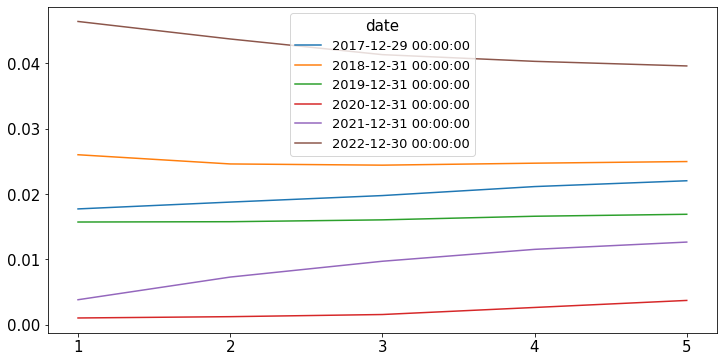

In [10]:
spots.T.plot(xticks=spots.columns);

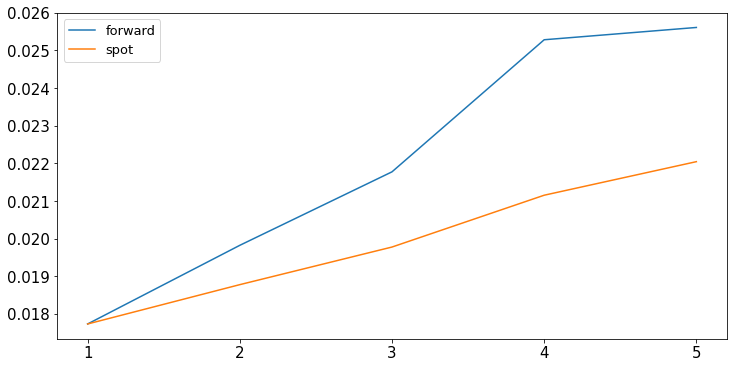

In [11]:
ax = f.loc[DATE].T.plot(xticks=f.columns)
spots.loc[DATE].T.plot(ax=ax)
ax.legend(['forward','spot']);

The forward curve is above the spot curve throughout the 5 years, and hence the spot curve is upward sloping over the entire range.

## <span style="color:red">1.4</span>

In [12]:
temp = f.loc[DATE].T

temp.columns.name = f'{DATE}: (n-1) to n'
temp.columns = [f'forward curve']
if DATE == '2017':
    temp['spot over time'] = spots[1].values[:-1]
elif DATE == '2018':
    temp['spot over time'] = spots[1].values[1:]

temp

,forward curve,spot over time
1,0.017734,0.017734
2,0.019823,0.026026
3,0.021774,0.015729
4,0.025281,0.001042
5,0.025607,0.003834


The realized one-year spot rates over 2018-2022 are much lower than what was implied by the 2017 forward curve---with the exception of the realized spot in 2019 (at year 2) being higher than the forward rate implication.

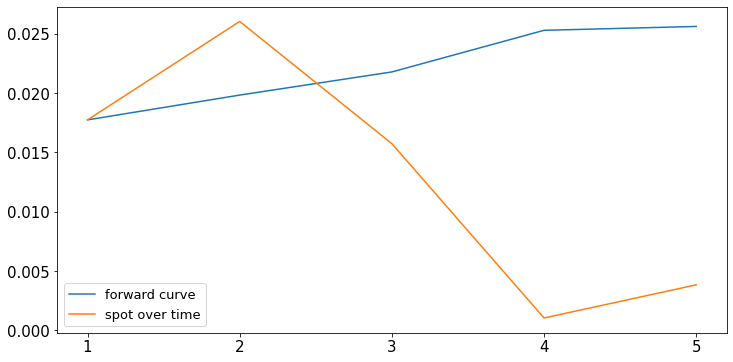

In [13]:
ax = temp.plot(xticks=temp.index)

# <span style="color:red">Solution 2</span>

Parameters from the problem.

For simplicity, we assume 2% of the gross assets are required investor capital. 

#### Note on the haircut and required capital

One could complain that the haircut on the long position is balanced by receiving the haircut on the short position, and thus no capital is intitially required. However, the trade requires capital be available to handle the cash losses in the first few years of the trade. These losses end up being more than 2% of the gross initial assets, so it seems our simple assumption here is not so conservative.

In [14]:
HAIRCUT = .02
INIT_SIZE = 1e8
FACE = 1e6

#### Timing
We continue to examine just the six dates above.

You could easily extend this problem to look at a wider range of time.

#### Bonds and cash
Add a column for the `cash` position, to account for the one-year bill maturing and needing to be rolled over.

#### Face Value
There is no mention of how large the face value is on each bond. Obviously this choice will not do anything more than scale the number of contracts in the trade. Below, we proceed with a face value of \\$1 million. This will simply scale the `positions` and `p` dataframes.

In [15]:
p = px.copy()
p.insert(0,'cash',1)
p *= FACE

## <span style="color:red">2.1</span>

In [16]:
value = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)
pnl = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)

pnl.loc['2017'] = 0
value.loc['2017'] = np.array([0,-INIT_SIZE,0,0,0,INIT_SIZE])
positions = value / p

dt_end = p.index[-1]

for i, dt in enumerate(p.index[1:]):
    dt_lag = p.index[i]
    
    positions.loc[dt] = positions.loc[dt_lag].shift(-1)
    positions.loc[dt,5] = 0        

    
    if dt != dt_end:
        positions.loc[dt,1] += -INIT_SIZE / p.loc[dt,1]
        positions.loc[dt,'cash'] += INIT_SIZE / p.loc[dt,'cash']

    value.loc[dt] = positions.loc[dt] * p.loc[dt]
    pnl.loc[dt] = value.loc[dt] - value.loc[dt_lag]
    pnl.loc[dt,'cash'] = value.loc[dt,'cash']
    
    
pnl.insert(0,'net',pnl.sum(axis=1))
pnl.loc['cumulative','net'] = pnl['net'].sum()

### Positions

Recall we are setting the initial positions to have long and short positions with assets of \\$100 million each.

#### Aging
Recall that a 5-year bond becomes a 4 year bond, etc.

#### Rollover
There is a question on the rolling over of the 1-year note. At each year, you must close the old short position and enter a new short position on the one-year note. 

You have two options of how to size this:

* Take short position of \\$100 million, just as you started with. This will require adding capital (taking a loss) at each rollover, as the short position will increase in price.

* Take a short position equal to the amount of money coming due on the old short position. In this scenario, the short position will be growing each time we roll it over.

Given that the problem was not specific on this point, either choice is fine.

The solution below follows the first of these specifications: it takes a short position of \\$100 million each year, adding in the necessary cash to close out the expiring short which has value of more than \\$100 million.

In [17]:
positions.replace(0,np.nan,inplace=True)
positions.style.format('{:,.5}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2017-12-29 00:00:00,,-101.79,,,,111.65
2018-12-31 00:00:00,-1.7892,-102.64,,,111.65,
2019-12-31 00:00:00,-2.6368,-101.59,,111.65,,
2020-12-31 00:00:00,-1.5853,-100.1,111.65,,,
2021-12-31 00:00:00,-0.10424,11.268,,,,
2022-12-30 00:00:00,11.268,,,,,


## Value

Given the positions above and the prices of the zero-coupon bonds, (in other words, the discount factors, $Z$,) we can easily calculate the value of the positions at each date.

Notice that the value of 1-year bonds is a constant negative \\$100 million through 2020 given the rollover choice we made above.

The value in the `cash` column is the cash needed to close out the maturing short given our choice to short a constant 100 million each year. In the final year, the `cash` column shows the net profit on closing out the position.

In [18]:
value.replace(0,np.nan,inplace=True)
value.style.format('${:,.2f}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2017-12-29 00:00:00,,"$-100,000,000.00",,,,"$100,000,000.00"
2018-12-31 00:00:00,"$-1,789,246.57","$-100,000,000.00",,,"$101,134,709.32",
2019-12-31 00:00:00,"$-2,636,787.00","$-100,000,000.00",,"$106,400,629.08",,
2020-12-31 00:00:00,"$-1,585,323.78","$-100,000,000.00","$111,375,389.81",,,
2021-12-31 00:00:00,"$-104,244.84","$11,225,030.10",,,,
2022-12-30 00:00:00,"$11,268,150.88",,,,,


## Profit and Loss

The profit and loss is below. The table shows the pnl of closing out the old position and in the new position.

Consider Dec 2018:

* It shows a loss of value of \\$100 million in the 5-year bond. But this is offset by a new positive position in the 4-year bond. Clearly, this is just due to aging of the bond reducing the position of the former by \\$100 million and adding to the position of the latter by even more. 

* The cash collumn shows the amount of cash needed from the investor to close the maturing short, as the 1-year bond has matured, and the new short of 1-year bonds does not fully offset it (given the rollover choice above.)

In [19]:
pnl.replace(0,np.nan,inplace=True)
pnl.style.format('${:,.2f}',na_rep='')

,net,cash,1,2,3,4,5
date,,,,,,,
2017-12-29 00:00:00,,,,,,,
2018-12-31 00:00:00,"$-654,537.25","$-1,789,246.57",,,,"$101,134,709.32","$-100,000,000.00"
2019-12-31 00:00:00,"$2,629,132.76","$-2,636,787.00",,,"$106,400,629.08","$-101,134,709.32",
2020-12-31 00:00:00,"$3,389,436.95","$-1,585,323.78",,"$111,375,389.81","$-106,400,629.08",,
2021-12-31 00:00:00,"$-254,604.54","$-104,244.84","$111,225,030.10","$-111,375,389.81",,,
2022-12-30 00:00:00,"$43,120.77","$11,268,150.88","$-11,225,030.10",,,,
cumulative,"$5,152,548.68",,,,,,


## Closing out the Trade

The trade was specified such that the investor holds the 5-year bond until maturity in December 2022.

However, note that as of December 2021, the trade is essentially done. At that point, the original 5-year bond is now a 1-year bond. So the construction above stays long this bond, maturing in a year, while setting up a fresh short position in the 1-year bond. These mostly offset, and we see that the P&L that final year is deminimus.

We could easily close out the trade in December 2021 with roughly the same total profit.

## Returns

In [20]:
capital = HAIRCUT * INIT_SIZE * 2

cum_ret = pnl['net'].cumsum().drop('cumulative') / capital - 1
cum_ret.name = 'cumulative return'
cum_ret = cum_ret.loc['2018':]
cum_ret

date
2018-12-31   -1.163634
2019-12-31   -0.506351
2020-12-31    0.341008
2021-12-31    0.277357
2022-12-30    0.288137
Name: cumulative return, dtype: float64

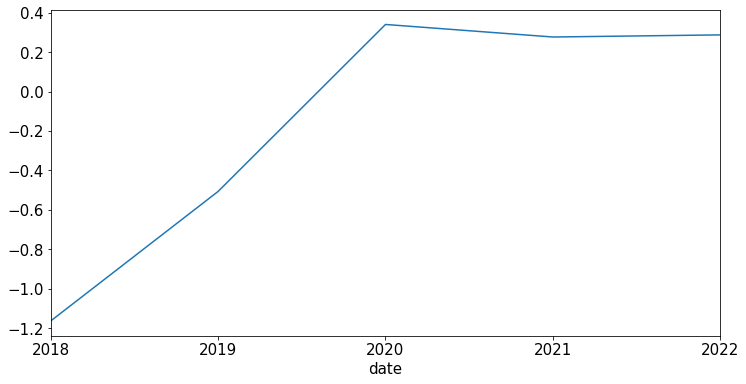

In [21]:
cum_ret.plot();

### Negative intermediate returns

Note that in the first few years, the trade requires capital to close out the short positions. This leads to substantial capital outflows in these years, (showing up above as a negative cumulative return in 2018 and 2019.)

### Total return

By the end of the trade, the cumulative return is 28.8% on the initial capital of \\$4 million.

## Attribution

Note that the profit is particularly large in 2019, as the bond goes from 4 years of maturity to 3 years of maturity.

Look at the spot rates to see why this is the case.
* In 2018, the 4-year rate is higher than the 5-year rate was in 2017. Thus, that first year does not lead to strong profit.
* The 2019 3-year rate is much lower than the 2018 4-year rate, so the profit on the long side is substantial.
* In 2020, the 2-year rate is tiny compared to the 3-year rate in 2019, and accordingly, we see large profit on the long side of the trade.

In [22]:
spots

,1,2,3,4,5
date,,,,,
2017-12-29,0.017734,0.018779,0.019777,0.021153,0.022044
2018-12-31,0.026026,0.024617,0.024431,0.024734,0.024984
2019-12-31,0.015729,0.015777,0.016059,0.016612,0.016913
2020-12-31,0.001042,0.001242,0.001571,0.002650,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618


## <span style="color:red">2.2</span>

In this scenario, the trade wouldn't be profitable: the return to holding the 5-year bond would equal the return to holding the one-year bond and rolling it over five years.

## <span style="color:red">2.3</span>

This is a question as to whether the forward-spot spread is bigger in 2017 or 2022. In W.5., we learned (in Dynamic Fact 3) that in times of higher forward-spot spreads, the expected excess return and realized yields are larger.

The table below shows that the forward-spot spread on 5-year bonds was 36bps in 2017 and negative 28bps in 2022. Thus, we expect that the return to this trade (long 5-year bond, short 1-year bond) will be substantially worse in 2022-2027.

In [23]:
f-spots

,1,2,3,4,5
date,,,,,
2017-12-29,0.0,0.001044,0.001997,0.004128,0.003563
2018-12-31,0.0,-0.001410,-0.000370,0.000908,0.001000
2019-12-31,0.0,0.000048,0.000564,0.001659,0.001204
2020-12-31,0.0,0.000200,0.000658,0.003238,0.004308
2021-12-31,0.0,0.003469,0.004841,0.005463,0.004456
2022-12-30,0.0,-0.002681,-0.004797,-0.003071,-0.002819
